In [1]:
from tbi.convert import convert
from tbi.preprocessing import preprocessing
from tbi.skull_strip import skull_strip
from tbi.segmentation import segmentation
from tbi.label_geometry_measures import label_geometry_measures
from tbi.image_intensity_stat_jac import image_intensity_stat_jac

from glob import glob
from nilearn.plotting import plot_img
from os.path import join

import os


In [2]:
dcmfiles = '/data/BR-1001/*/*/'
convert_prefix = 'BR1001'
output = '/data/out'
mni_file = '/data/MNI152_T1_1mm_brain.nii'
atlas_file = '/data/New_atlas_cort_asym_sub.nii.gz'
template_file = '/data/TemplateYoungM_128.nii.gz'

In [3]:
convert_dir = join(output, 'convert')
convert_args = ['-p',
                convert_prefix,
                dcmfiles, 
                convert_dir
               ]
convert(convert_args)

2020-08-27 18:43:11,624 :: tbi.convert :: INFO :: Using args:Namespace(input='/data/BR-1001/*/*/', output='/data/out/convert', prefix='BR1001')
2020-08-27 18:43:11,668 :: tbi.convert :: INFO :: Processing folder /data/BR-1001/Ct Head W-O Contrast 5673454104517364 20100714/HEAD ROUT 5.0 H30s 2 120000/
2020-08-27 18:43:14,681 :: tbi.convert :: INFO :: Saved /data/out/convert/BR1001_HEAD_ROUT_5_0_H30s_2_120000.nii
2020-08-27 18:43:14,683 :: tbi.convert :: INFO :: Exiting!


Plotting BR1001_HEAD_ROUT_5_0_H30s_2_120000.nii


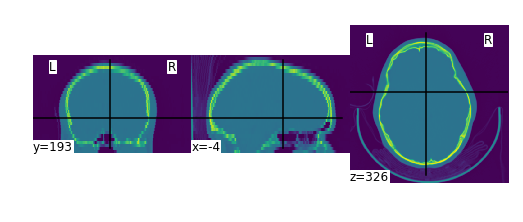

In [4]:
nii_files = os.listdir(convert_dir)

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plot_img(join(convert_dir, nii_file))

In [5]:
preprocessing_dir = join(output, 'preprocessing')
preprocessing_args = ['-m', 
                      mni_file, 
                      join(convert_dir, '*.nii'), 
                      preprocessing_dir
                     ]
preprocessing(preprocessing_args)

2020-08-27 18:44:21,569 :: tbi.preprocessing :: INFO :: Using args:Namespace(input='/data/out/convert/*.nii', mni_file='/data/MNI152_T1_1mm_brain.nii', output='/data/out/preprocessing')
2020-08-27 18:44:21,604 :: tbi.preprocessing :: INFO :: Processing file /data/out/convert/BR1001_HEAD_ROUT_5_0_H30s_2_120000.nii
2020-08-27 18:51:35,052 :: tbi.preprocessing :: INFO :: Saved /data/out/preprocessing/BR1001_HEAD_ROUT_5_0_H30s_2_120000
2020-08-27 18:51:35,055 :: tbi.preprocessing :: INFO :: Exiting!


Plotting BR1001_HEAD_ROUT_5_0_H30s_2_120000_normalizedWarped.nii.gz
Plotting BR1001_HEAD_ROUT_5_0_H30s_2_120000_normalizedInverseWarped.nii.gz


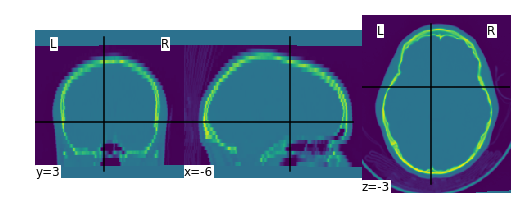

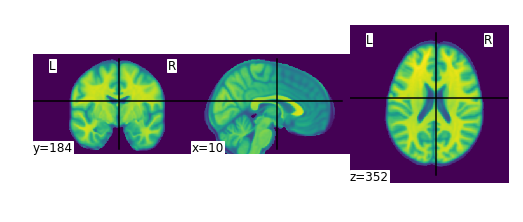

In [6]:
nii_files = os.listdir(preprocessing_dir)

for nii_file in nii_files:
    if nii_file.endswith(".nii.gz"):
        print('Plotting {0}'.format(nii_file))
        plot_img(join(preprocessing_dir, nii_file))
        

In [7]:
skull_strip_dir = join(output, 'skull_strip')
skull_strip_args = [join(preprocessing_dir, '*_normalizedWarped.nii.gz'),
                    skull_strip_dir
                   ]
skull_strip(skull_strip_args)

2020-08-27 18:55:26,294 :: tbi.skull_strip :: INFO :: Arguments: Namespace(append='_brain', input='/data/out/preprocessing/*_normalizedWarped.nii.gz', output='/data/out/skull_strip', strip='_normalizedWarped')
2020-08-27 18:55:26,352 :: tbi.skull_strip :: INFO :: Processing file /data/out/preprocessing/BR1001_HEAD_ROUT_5_0_H30s_2_120000_normalizedWarped.nii.gz
2020-08-27 18:56:06,625 :: tbi.skull_strip :: INFO :: Exiting!


Plotting BR1001_HEAD_ROUT_5_0_H30s_2_120000_brain.nii.gz


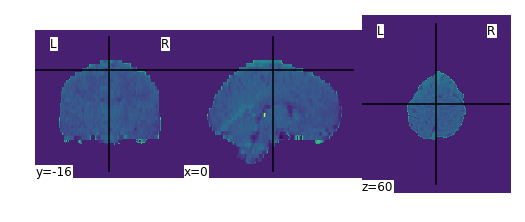

In [8]:
nii_files = os.listdir(skull_strip_dir)

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plot_img(join(skull_strip_dir, nii_file))

In [9]:
skulls = join(skull_strip_dir, '*_brain.nii.gz')
segmentation_dir = join(output, 'segmentation')
segmentation_args = ['-t', 
                     template_file, 
                     '-a', 
                     atlas_file, 
                     skulls, 
                     segmentation_dir
                    ]
segmentation(segmentation_args)

2020-08-27 18:58:45,091 :: tbi.segmentation :: INFO :: Arguments: Namespace(atlas_file='/data/New_atlas_cort_asym_sub.nii.gz', input='/data/out/skull_strip/*_brain.nii.gz', output='/data/out/segmentation', template_file='/data/TemplateYoungM_128.nii.gz')
2020-08-27 18:58:45,128 :: tbi.segmentation :: INFO :: Processing /data/out/skull_strip/BR1001_HEAD_ROUT_5_0_H30s_2_120000_brain.nii.gz
2020-08-27 18:58:45,140 :: tbi.segmentation :: INFO :: Registering /data/out/skull_strip/BR1001_HEAD_ROUT_5_0_H30s_2_120000_brain.nii.gz
2020-08-27 19:08:49,536 :: tbi.segmentation :: INFO :: Physical: 23.76384139060974
2020-08-27 19:09:24,054 :: tbi.segmentation :: INFO :: Affine: 34.512863636016846
2020-08-27 19:09:24,057 :: tbi.segmentation :: INFO :: Exiting!


/data/out/segmentation/SEG/PHYSCi/BR1001_HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_phy.nii.gz
/data/out/segmentation/SEG/AFFINE/BR1001_HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_affine.nii.gz


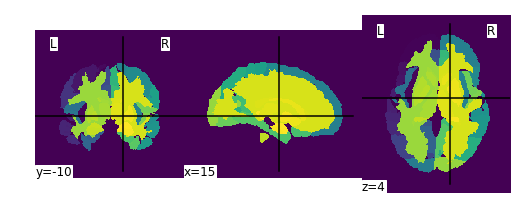

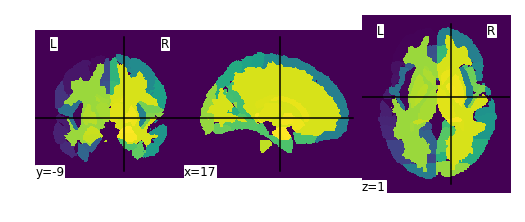

In [10]:
nii_files = glob(join(segmentation_dir, 'SEG/*/*.nii.gz'))
for nii_file in nii_files:
    print(nii_file)
    plot_img(nii_file)

In [11]:
nii_files = glob(join(segmentation_dir, 'REGIS/Affine2SyN/*affine2Syn1Warp.nii.gz'))
for nii_file in nii_files:
    print(nii_file)
    #Need to figure out how to plot this 5 dimension image
    #plot_img(nii_file)


/data/out/segmentation/REGIS/Affine2SyN/BR1001_HEAD_ROUT_5_0_H30s_2_120000_preprocessed_affine2Syn1Warp.nii.gz


In [12]:
label_geometry_measures_dir = join(output, 'label_geometry_measures')
label_geometry_measures_args = [join(segmentation_dir, 'SEG/*/*.nii.gz'),
                                label_geometry_measures_dir
                               ]
label_geometry_measures(label_geometry_measures_args)

2020-08-27 19:10:42,981 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/out/segmentation/SEG/PHYSCi/BR1001_HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_phy.nii.gz
2020-08-27 19:10:42,983 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/out/label_geometry_measures/BR1001_HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_phy.txt
2020-08-27 19:10:44,547 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/out/segmentation/SEG/AFFINE/BR1001_HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_affine.nii.gz
2020-08-27 19:10:44,549 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/out/label_geometry_measures/BR1001_HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_affine.txt


In [13]:
image_intensity_stat_jac_dir = join(output, 'image_intensity_stat_jac')

image_intensity_stat_jac_args = ['-a',
                                 atlas_file,
                                 join(segmentation_dir, 'REGIS/Affine2SyN/*affine2Syn1Warp.nii.gz'), 
                                 image_intensity_stat_jac_dir
                                ]

image_intensity_stat_jac(image_intensity_stat_jac_args)

2020-08-27 19:10:58,167 :: tbi.image_intensity_stat_jac :: INFO :: Processing file name:  /data/out/segmentation/REGIS/Affine2SyN/BR1001_HEAD_ROUT_5_0_H30s_2_120000_preprocessed_affine2Syn1Warp.nii.gz
2020-08-27 19:10:58,177 :: tbi.image_intensity_stat_jac :: INFO :: Saving to file name: /data/out/image_intensity_stat_jac/BR1001_HEAD_ROUT_5_0_H30s_2_120000_preprocessed_affine2Syn1Warp.txt
